Please see final project document for references on tutorials that were included in this analysis.

### Preprocessing of Disaster and Non Disaster Data

In [216]:
!pip install tweet-preprocessor
!pip install WordCloud

     |████████████████████████████████| 366 kB 8.0 MB/s eta 0:00:01


In [212]:
#import data

import pandas as pd

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [214]:
#tokenization, removal of digits, stop words, and punctuations

#important libraries for preprocessing using NLTK
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer

#Remove Digits and lower the text 

train_data["text"] = train_data["text"].astype(str).str.replace('\d+', '')
train_data["text"] = train_data["text"].str.lower()

# remove punctuations 
import string
def remove_punctuation(s):
    s = ''.join([i for i in s if i not in set(string.punctuation)])
    return s

train_data["text"] = train_data["text"].apply(remove_punctuation)



# lemmatization and tokenization 

lemmatizer = nltk.stem.WordNetLemmatizer()
w_tokenizer = TweetTokenizer()
def lemmatize_text(text):
 return [(lemmatizer.lemmatize(w)) for w in \
                                     w_tokenizer.tokenize((text))]


train_data["text"] = train_data["text"].apply(lemmatize_text)

train_data.head(5)




[nltk_data] Downloading package wordnet to /home/jupyter/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  from ipykernel import kernelapp as app


,id,keyword,location,text,target
0,1,NaN,NaN,"[our, deed, are, the, reason, of, this, earthq...",1
1,4,NaN,NaN,"[forest, fire, near, la, ronge, sask, canada]",1
2,5,NaN,NaN,"[all, resident, asked, to, shelter, in, place,...",1
3,6,NaN,NaN,"[people, receive, wildfire, evacuation, order,...",1
4,7,NaN,NaN,"[just, got, sent, this, photo, from, ruby, ala...",1


### Make a cloud of the disaster and non disaster tweets

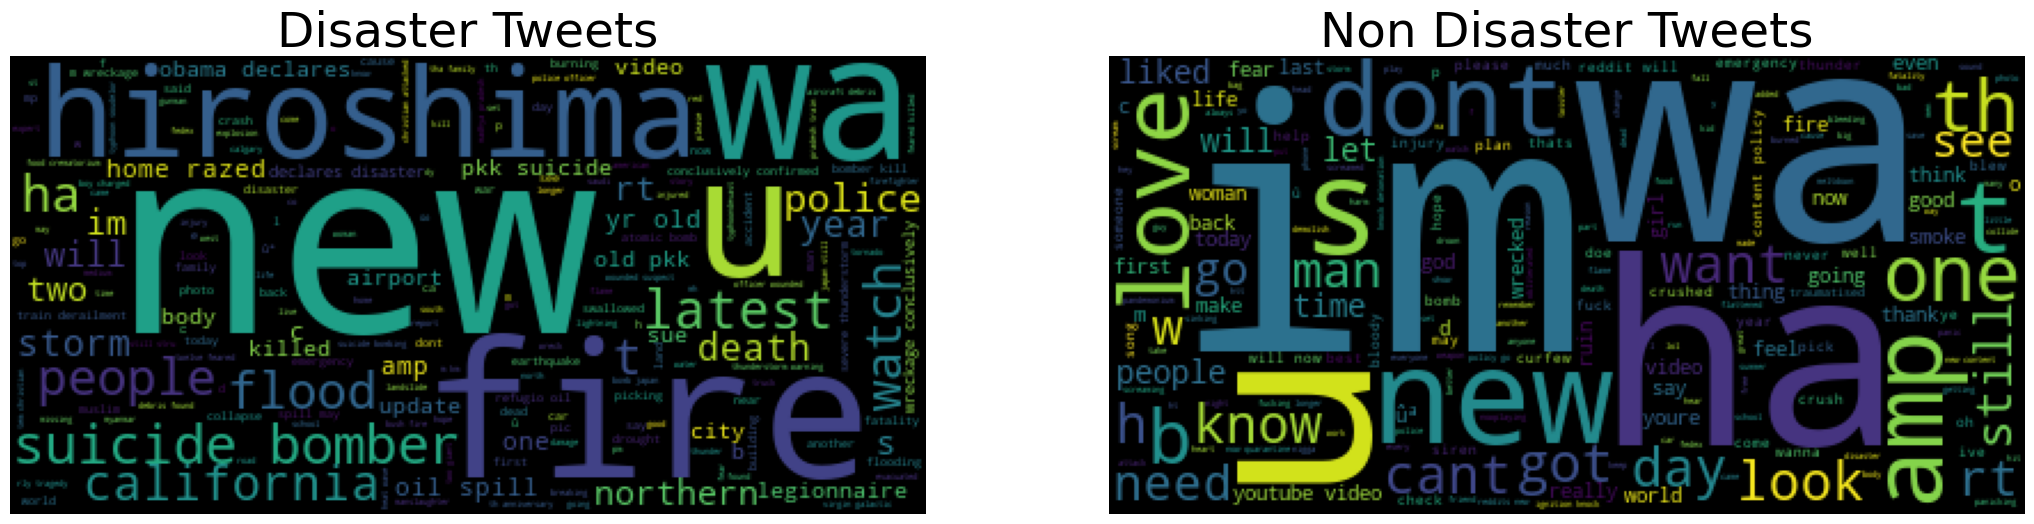

In [217]:
#make a word cloud for the disaster and non disaster tweets
from wordcloud import WordCloud
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[26, 8])

disaster_text = train_data[train_data["target"]==1]["text"]
non_disaster_text = train_data[train_data["target"]==0]["text"]

disaster_word_cloud = WordCloud().generate(disaster_text.to_string())
non_disaster_word_cloud = WordCloud().generate(non_disaster_text.to_string())

ax1.imshow(disaster_word_cloud)
ax1.axis('off')
ax1.set_title("Disaster Tweets", fontsize = 35);

ax2.imshow(non_disaster_word_cloud )
ax2.axis('off')
ax2.set_title("Non Disaster Tweets", fontsize = 35);

### Model Using Bayes 

In [218]:
#load data

import pandas as pd

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")


In [219]:
!pip install emoji
!pip install nltk

In [220]:
#pre process the data 
import string
import emoji
import re

def removePunctuations(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def removeEmojis(text):
    allchars = [c for c in text]
    emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI["en"]]
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
    return clean_text

def removeNumbers(text):
    clean_text = re.sub(r'\d+', '', text)
    return clean_text

def removeLinks(text):
    clean_text = re.sub('https?://\S+|www\.\S+', '', text)
    #https? will match both http and https
    #A|B, where A and B can be arbitrary REs, creates a regular expression that will match either A or B.
    #\S Matches any character which is not a whitespace character.
    #+ Causes the resulting RE to match 1 or more repetitions of the preceding RE. ab+ will match ‘a’ followed by any non-zero number of ‘b’s; it will not match just ‘a’.
    return clean_text

def clean(text):
    text = text.lower() #Lets make it lowercase
    text = removePunctuations(text)
    text = removeEmojis(text)
    text = removeNumbers(text)
    text = removeLinks(text)
    return text



df_train['text']=df_train.text.apply(clean)
df_test['text']=df_test.text.apply(clean)

In [221]:
import nltk
nltk.download('stopwords')

#remove stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')

df_train['text'] = df_train.text.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_test['text'] = df_test.text.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))



[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [222]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,residents asked shelter place notified officer...,1
3,6,NaN,NaN,people receive wildfires evacuation orders cal...,1
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1


In [223]:
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer

y = df_train['target']

X_train, X_test, y_train, y_test = train_test_split(
    df_train['text'], y, 
    test_size = .33, 
    random_state =53)

count_vectorizer = CountVectorizer(stop_words ='english')
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)


In [224]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

nb_classifier = MultinomialNB()

nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test) 
metrics.accuracy_score(y_test, pred)

#passing predicted and test labels; accuracy means percentage of correct guesses at of total guesses



0.7867091126144051

In [225]:
metrics.confusion_matrix(y_test,pred, labels =[0,1] )

#On right would be true labels; top what its labeled as! 
# a bit skewed 

array([[1204,  216],
       [ 320,  773]])

### Model using Neural Net

In [168]:
train_x = df_train.text
train_y = df_train.target

In [169]:
!pip install keras
!pip install tensorflow

In [171]:
#make model 

import json
import keras
import keras.preprocessing.text as kpt
from keras.preprocessing.text import Tokenizer
import numpy as np

# create our training data from the tweets
train_x = df_train.text
# index all the sentiment labels
train_y = df_train.target

# only work with the 3000 most popular words found in our dataset
max_words = 3000

# create a new Tokenizer
tokenizer = Tokenizer(num_words=max_words)
# feed our tweets to the Tokenizer
tokenizer.fit_on_texts(train_x)

# Tokenizers come with a convenient list of words and IDs
dictionary = tokenizer.word_index
# Let's save this out so we can use it later
with open('dictionary.json', 'w') as dictionary_file:
    json.dump(dictionary, dictionary_file)

def convert_text_to_index_array(text):
    # one really important thing that `text_to_word_sequence` does
    # is make all texts the same length -- in this case, the length
    # of the longest text in the set.
    return [dictionary[word] for word in kpt.text_to_word_sequence(text)]

allWordIndices = []
# for each tweet, change each token to its ID in the Tokenizer's word_index
for text in train_x:
    wordIndices = convert_text_to_index_array(text)
    allWordIndices.append(wordIndices)

# now we have a list of all tweets converted to index arrays.
# cast as an array for future usage.
allWordIndices = np.asarray(allWordIndices)

# create one-hot matrices out of the indexed tweets
train_x = tokenizer.sequences_to_matrix(allWordIndices, mode='binary')
# treat the labels as categories
train_y = keras.utils.to_categorical(train_y, 2)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

model = Sequential()
model.add(Dense(512, input_shape=(max_words,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

model.fit(train_x, train_y,
    batch_size=32,
    epochs=5,
    verbose=1,
    validation_split=0.1,
    shuffle=True)

model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)

model.save_weights('model.h5')

print('saved model!')

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Epoch 1/5
215/215 [==============================] - 2s 9ms/step - loss: 0.6977 - accuracy: 0.6142 - val_loss: 0.4367 - val_accuracy: 0.8097
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3852 - accuracy: 0.8316 - val_loss: 0.4518 - val_accuracy: 0.7913
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2801 - accuracy: 0.8874 - val_loss: 0.5028 - val_accuracy: 0.7874
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2037 - accuracy: 0.9215 - val_loss: 0.5655 - val_accuracy: 0.7756
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1551 - accuracy: 0.9420 - val_loss: 0.6446 - val_accuracy: 0.7717
saved model!


In [172]:
import json
import numpy as np
import keras
import keras.preprocessing.text as kpt
from keras.preprocessing.text import Tokenizer
from keras.models import model_from_json

# we're still going to use a Tokenizer here, but we don't need to fit it
tokenizer = Tokenizer(num_words=3000)
# for human-friendly printing
labels = ['non_disaster', 'disaster']

# read in our saved dictionary
with open('dictionary.json', 'r') as dictionary_file:
    dictionary = json.load(dictionary_file)

# this utility makes sure that all the words in your input
# are registered in the dictionary
# before trying to turn them into a matrix.
def convert_text_to_index_array(text):
    words = kpt.text_to_word_sequence(text)
    wordIndices = []
    for word in words:
        if word in dictionary:
            wordIndices.append(dictionary[word])
        else:
            print("'%s' not in training corpus; ignoring." %(word))
    return wordIndices

# read in your saved model structure
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
# and create a model from that
model = model_from_json(loaded_model_json)
# and weight your nodes with your saved values
model.load_weights('model.h5')

evalSentence = df_test.text[0]
# format your input for the neural net
testArr = convert_text_to_index_array(evalSentence)
yo = tokenizer.sequences_to_matrix([testArr], mode='binary')
# predict which bucket your input belongs in
pred = model.predict(yo)
# and print it for the humons
print("%s sentiment; %f%% confidence" % (labels[np.argmax(pred)], pred[0][np.argmax(pred)] * 100))

disaster sentiment; 64.069766% confidence


In [184]:
evalSentence = df_test.text[1]
# format your input for the neural net
testArr = convert_text_to_index_array(evalSentence)
yo = tokenizer.sequences_to_matrix([testArr], mode='binary')
# predict which bucket your input belongs in
pred = model.predict(yo)
# and print it for the humons
print("%s sentiment; %f%% confidence" % (labels[np.argmax(pred)], pred[0][np.argmax(pred)] * 100))

'about' not in training corpus; ignoring.
'is' not in training corpus; ignoring.
disaster sentiment; 98.339832% confidence


In [185]:
evalSentence = df_test.text[8]
# format your input for the neural net
testArr = convert_text_to_index_array(evalSentence)
yo = tokenizer.sequences_to_matrix([testArr], mode='binary')
# predict which bucket your input belongs in
pred = model.predict(yo)
# and print it for the humons
print("%s sentiment; %f%% confidence" % (labels[np.argmax(pred)], pred[0][np.argmax(pred)] * 100))

'what' not in training corpus; ignoring.
'a' not in training corpus; ignoring.
non_disaster sentiment; 99.366271% confidence


In [191]:
evalSentence = df_test.text[27]
# format your input for the neural net
testArr = convert_text_to_index_array(evalSentence)
yo = tokenizer.sequences_to_matrix([testArr], mode='binary')
# predict which bucket your input belongs in
pred = model.predict(yo)
# and print it for the humons
print("%s sentiment; %f%% confidence" % (labels[np.argmax(pred)], pred[0][np.argmax(pred)] * 100))

''burning' not in training corpus; ignoring.
'rahm'' not in training corpus; ignoring.
'let's' not in training corpus; ignoring.
'a' not in training corpus; ignoring.
'mayoral' not in training corpus; ignoring.
'effigy' not in training corpus; ignoring.
'100' not in training corpus; ignoring.
'tall' not in training corpus; ignoring.
'it' not in training corpus; ignoring.
't' not in training corpus; ignoring.
'kfo2mksn6y' not in training corpus; ignoring.
'kass' not in training corpus; ignoring.
disaster sentiment; 66.339445% confidence


In [204]:
evalSentence = df_test.text[108]
# format your input for the neural net
testArr = convert_text_to_index_array(evalSentence)
yo = tokenizer.sequences_to_matrix([testArr], mode='binary')
# predict which bucket your input belongs in
pred = model.predict(yo)
# and print it for the humons
print("%s sentiment; %f%% confidence" % (labels[np.argmax(pred)], pred[0][np.argmax(pred)] * 100))

'on' not in training corpus; ignoring.
'the' not in training corpus; ignoring.
'up' not in training corpus; ignoring.
'https' not in training corpus; ignoring.
't' not in training corpus; ignoring.
'wjscdvcevh' not in training corpus; ignoring.
non_disaster sentiment; 86.351067% confidence
